# Project 1 (Projects Dynamics M20)

In [1]:
!pip install mysql.connector-python

  Using cached mysql_connector_python-8.0.21-cp37-cp37m-win_amd64.whl (809 kB)


In [32]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy           
from scipy import stats
from scipy.stats import percentileofscore

In [3]:
con=mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='24042020',
    database='student')

In [4]:
df=pd.read_sql_query('select * from project',con)
df

,name,gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-01-05,45,87,52,89,55,89,87,52
6,pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [5]:
df.set_index('name',inplace=True)
df

,gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
name,,,,,,,,,,
John,M,1988-04-05,55,45,56,87,21,52,89,65
Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
Annu,F,1988-01-05,45,87,52,89,55,89,87,52
pooja,F,1987-05-04,55,64,61,58,75,58,64,61
Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
Farha,F,1990-08-12,55,63,89,75,78,75,63,89


In [6]:
df.rename(columns={'gender':'Gender'},inplace=True)
print(df)

         Gender        DOB  Maths  Physics  Chemistry  English  Biology  \
name                                                                      
John          M 1988-04-05     55       45         56       87       21   
Suresh        M 1987-05-04     75       96         78       64       90   
Ramesh        M 1989-05-25     25       54         89       76       95   
Jessica       F 1990-08-12     78       96         86       63       54   
Jennifer      F 1989-09-02     58       96         78       46       96   
Annu          F 1988-01-05     45       87         52       89       55   
pooja         F 1987-05-04     55       64         61       58       75   
Ritesh        M 1989-05-25     54       76         87       56       25   
Farha         F 1990-08-12     55       63         89       75       78   
Mukesh        M 1989-09-02     96       46         77       83       58   

          Economics  History  Civics  
name                                  
John             52  

In [7]:
dfn=pd.DataFrame(data=df)
dfn

,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
name,,,,,,,,,,
John,M,1988-04-05,55,45,56,87,21,52,89,65
Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
Annu,F,1988-01-05,45,87,52,89,55,89,87,52
pooja,F,1987-05-04,55,64,61,58,75,58,64,61
Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
Farha,F,1990-08-12,55,63,89,75,78,75,63,89


# EDA

In [8]:
dfn.columns

Index(['Gender', 'DOB', 'Maths', 'Physics', 'Chemistry', 'English', 'Biology',
       'Economics', 'History', 'Civics'],
      dtype='object')

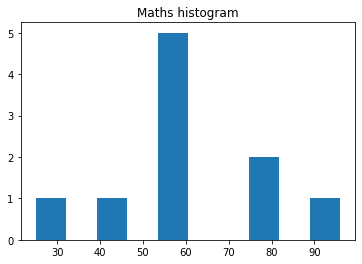

In [9]:
plt.hist(dfn['Maths'],bins=10)
plt.title('Maths histogram')
plt.show(
# this way we can see the frequency of Maths marks. Most of the students scored 60

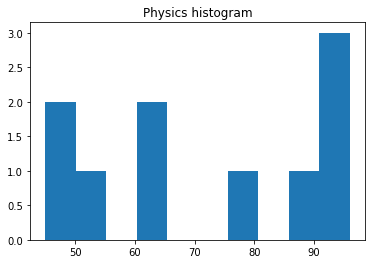

In [17]:
plt.hist(dfn['Physics'],bins=10)
plt.title('Physics histogram')
plt.show()
# this way we can see the frequency of Physics marks. 4 of the students scored around 90

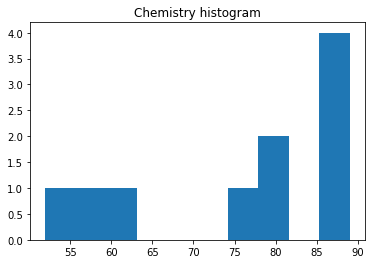

In [15]:
plt.hist(dfn['Chemistry'],bins=10)
plt.title('Chemistry histogram')
plt.show()
# this way we can see the frequency of Chemistry marks. 4 of the students scored between 85-90

{'whiskers': [<matplotlib.lines.Line2D at 0x26817323488>,
 'caps': [<matplotlib.lines.Line2D at 0x26817323d48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2681731fa88>],
 'medians': [<matplotlib.lines.Line2D at 0x26817326cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2681732cb48>],
 'means': []}

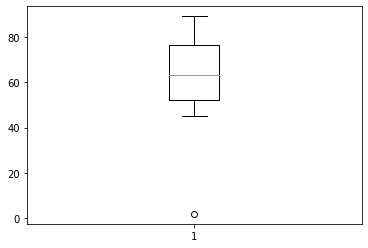

In [26]:
plt.boxplot(dfn['Civics']) 
# as we can see students fared well in Civics overall

{'whiskers': [<matplotlib.lines.Line2D at 0x26817384648>,
 'caps': [<matplotlib.lines.Line2D at 0x26817384f08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2681737ec88>],
 'medians': [<matplotlib.lines.Line2D at 0x26817388e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x2681738ecc8>],
 'means': []}

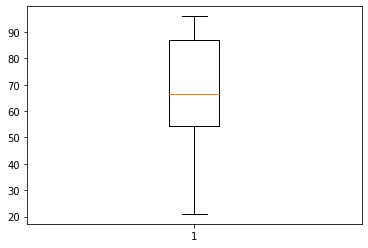

In [27]:
plt.boxplot(dfn['Biology'])
# One student scored quite low. others fared ok in Biology

{'bodies': [<matplotlib.collections.PolyCollection at 0x268170cb548>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x26816f55848>,
 'cmins': <matplotlib.collections.LineCollection at 0x268170cbf08>,
 'cbars': <matplotlib.collections.LineCollection at 0x2681709cf48>}

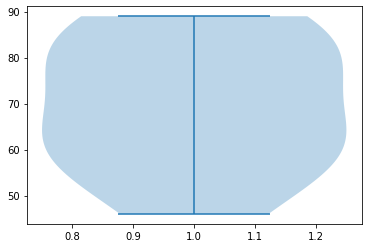

In [13]:
plt.violinplot(dfn['English'])
# with the help of this we can observe most of the students scored between 60-80 in English

{'bodies': [<matplotlib.collections.PolyCollection at 0x2681723c4c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x268171e9b48>,
 'cmins': <matplotlib.collections.LineCollection at 0x2681723cd48>,
 'cbars': <matplotlib.collections.LineCollection at 0x26817241c88>}

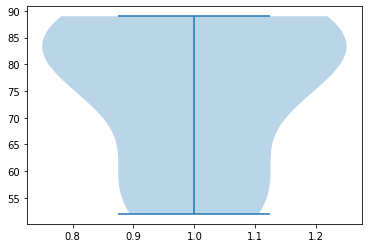

In [24]:
plt.violinplot(dfn['Chemistry'])
# with the help of this we can observe most of the students scored between 80-90 in Chemistry

{'bodies': [<matplotlib.collections.PolyCollection at 0x268172a8d88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x268172657c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x268172b0e48>,
 'cbars': <matplotlib.collections.LineCollection at 0x268172b0dc8>}

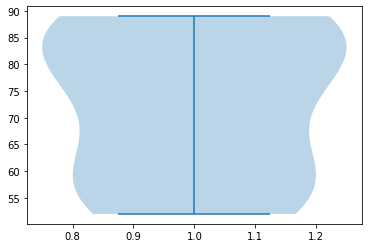

In [25]:
plt.violinplot(dfn['Economics'])
# with the help of this we can observe student scored fared ok in Economics

{'bodies': [<matplotlib.collections.PolyCollection at 0x268173e9c08>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x268172a8a48>,
 'cmins': <matplotlib.collections.LineCollection at 0x268173f2c08>,
 'cbars': <matplotlib.collections.LineCollection at 0x268173f2b88>}

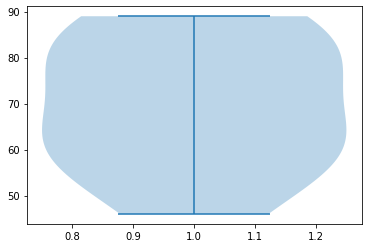

In [28]:
plt.violinplot(dfn['History'])
# with the help of this we can observe most of the students scored between 60-80 in this subject

In [23]:
dfn.describe()
### statistical summary of the dataset
#count-> total number of students 
#mean -> avg marks scored on each subject
#std -> standard deviation is quite high, meaning data is quite spread out
#min -> minimum marks scored on each subject
#25% ->25% students scored below that particluar mark
#max->maximum marks scored on each subject

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [31]:
dfn['Maths'].max(),dfn['Maths'].min(),dfn['Maths'].mean(),dfn['Maths'].median(),dfn['Maths'].std(),dfn['Maths'].var()

(96, 25, 59.6, 55.0, 19.46050130677807, 378.71111111111105)

In [33]:
percentileofscore(dfn['Civics'],25)
# we can calculate any percentile score in any subject

10.0

In [35]:
percentileofscore(dfn['Civics'],75)

70.0